In [78]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [79]:
train=pd.read_csv('/Users/namchangseok/cp1/train.csv')
test=pd.read_csv('/Users/namchangseok/cp1/test.csv')
sub=pd.read_csv('/Users/namchangseok/cp1/sample_submission.csv')

In [81]:
data=pd.concat([train,test],axis=0)#테스트셋과 트레인 셋을 합침

In [84]:
data.isnull().sum() # 결측치 값을 찾기, 크레딧은 지금 합쳣기 때문에 만개가 있을 수 밖에 없음

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [90]:
data=data.drop('occyp_type',axis=1)

In [91]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [93]:
data['gender'].unique() # 유니크와 len을 통해 해당 요소의 개수를 반환

array(['F', 'M'], dtype=object)

In [95]:
unique_len = data.apply(lambda x: len(x.unique()))

In [96]:
unique_len # 2개이하 2~10개이하 10개 이상 초과하는 것으로 구분짓자

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

In [100]:
group_1= unique_len[unique_len <=2].index #true에 해당하는 값들만 추출 가능
# unique len이 2 이하인 값 

In [102]:
group_2=unique_len[(unique_len>2) &(unique_len<=10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [104]:
group_3 =unique_len[(unique_len>10)].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [105]:
data[group_1] # 숫자로 되어있는 모델은 모델학습에 가능하지만 젠더나 카 부동산의 경우는 숫자로 변환 시켜줘야함


,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [107]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [112]:
data['gender'] = data['gender'].replace(['F','M'],[0,1]) # F-> 0 M->1 
data['car'] = data['car'].replace(['N','Y'],[0,1]) # N -> 0 Y->1
data['reality']=data['reality'].replace(['N','Y'],[0,1]) # N -> 0 Y->1

In [114]:
data[group_1] # group1의 모든 데이터들을 0과 1로 바꿨음 

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


In [117]:
data[group_2] #credit 은 예측해야 하는 값으로 건들지 않는다. 
# 숫자로 처리할 수 있는 데이터와 문자로 처리된 데이터를 다르게 해야한다


,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


<AxesSubplot:>

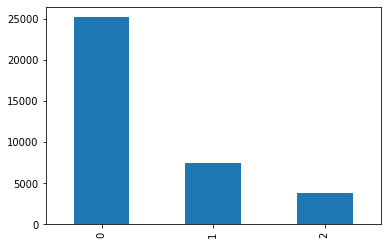

In [126]:
# 데이터가 어떤식으로 분포하는지 확인하기 위해 value count를 이용
data['child_num'].value_counts().plot.bar()

In [125]:
# 2보다 큰값을 모두 2로 바꿔주어 전처리해보자

data.loc[data['child_num']>2,'child_num']=2 #위 그래프롤 다시 사용해보자


In [127]:
#문자로 되어있는 데이터를 전환해보자 replace도 사용할 수 있지만 많은 시간이 소요 될 수도 있다.

data[group_2].apply(lambda x:len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [130]:
from sklearn import preprocessing #labe encoder 

In [131]:
label_encoder = preprocessing.LabelEncoder()# 카테고리컬 변수들을 숫자형으로 인코딩 해주는 인코더이다.

In [135]:
data['income_type'].unique() #총 5개가 있다 

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [138]:
data['income_type']= label_encoder.fit_transform(data['income_type']) # 순서대로 0~4까지 담긴다.
data['edu_type']= label_encoder.fit_transform(data['edu_type'])
data['family_type']= label_encoder.fit_transform(data['family_type'])
data['house_type']= label_encoder.fit_transform(data['house_type'])

In [139]:
data[group_2] # 2~10 개수를 가진 group2도 모두 숫자로 변경한 것을 볼 수 있다.

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


In [140]:
data[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [145]:
data['income_total'].min() , data['income_total'].max() #최솟값과 최댓값을 확인

(27000.0, 1575000.0)

In [146]:
len(data['income_total'].unique()) #265가지나 되는 값이 있음

265

In [147]:
import numpy as np

In [152]:
counts,bin_dividers= np.histogram(data['income_total'], bins=7) # bin은 몇개의 구간으로 나눌지 설정하는 것이다. 
# 7개로 나누었을때 각 구간의 변절점, 개수를 카운팅해준다

counts, bin_dividers

(array([29852,  6071,   413,    96,    11,     6,     8]),
 array([  27000.        ,  248142.85714286,  469285.71428571,
         690428.57142857,  911571.42857143, 1132714.28571429,
        1353857.14285714, 1575000.        ]))

In [156]:
pd.cut(data['income_total'],bins=bin_dividers, labels=[0,1,2,3,4,5,6]) # 실제 데이터의 income total 값을 수정 

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [162]:
# divier에 다른 옵션도 존재하는데 include lowest를 추가하면 구간의 시작점 또한 포함하게 된다.
pd.cut(data['income_total'],bins=bin_dividers,include_lowest=True,labels=[0,1,2,3,4,5,6]) # labels= np.arrang(7) or i for i range(7)
#카테고리는 시리즈와 다른 값이기에 pd cut을 factori 안에 넣어줘야한다

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [163]:
data['income_total']=pd.factorize(pd.cut(data['income_total'],bins=bin_dividers,include_lowest=True,labels=[0,1,2,3,4,5,6]))[0]

In [165]:
data['income_total']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: int64

In [166]:
data['DAYS_BIRTH'] #음수이기에 양수로 변경

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [167]:
def make_bin(array,n):
    array = -array
    counts,bin_dividers=np.histogram(array, bins=n)
    cut_catagory=pd.cut(array,bin_dividers, labels=[i for i in range(n)],include_lowest=True)
    bined_array=pd.factorize(cut_catagory)[0]
    return bined_array

In [172]:
#make_bin(data['DAYS_BIRTH'],10).values_counts() #numpy라서 오류가 남

pd.Series(make_bin(data['DAYS_BIRTH'],10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [173]:
data['DAYS_BIRTH']=make_bin(data['DAYS_BIRTH'],10)
data['DAYS_EMPLOYED']=make_bin(data['DAYS_EMPLOYED'],6)
data['begin_month']=make_bin(data['begin_month'],4)

In [217]:
data[group_3]


,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


In [218]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,2,0,1,1,1,0,2.0,1,NaN
9996,36453,1,1,1,0,0,4,4,0,1,5,0,1,1,0,0,2.0,2,NaN
9997,36454,0,0,1,0,1,4,4,1,1,8,0,1,0,0,0,2.0,3,NaN
9998,36455,0,1,0,0,0,0,4,1,1,4,0,1,0,1,0,2.0,2,NaN


In [176]:
train.shape, test.shape

((26457, 20), (10000, 19))

In [178]:
test = data[-10000:]
train=data[:-10000]

In [181]:
train_x= train.drop('credit',axis=1) #크레딧을 드롭 

In [182]:
train_y=train['credit']

In [183]:
test_x=test.drop('credit',axis=1)

In [188]:
train.shape, train_y.shape, test_x.shape

((26457, 19), (26457,), (10000, 18))

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
clf =RandomForestClassifier()

In [191]:
clf.fit(train_x,train_y)# train_x의 여러가지 컬럼을 조건을 보고 y에 대한 규칙을 만드는 학습을 한다. 어딘가에 저장할 필요는 없음  

RandomForestClassifier()

In [192]:
clf.predict_proba(train_x) #train_y에 대한 예측 확률을 나타낸다. 예를 들어 첫번째 row 는 두번째 확률인 0.73 즉 creidt 1값이 높을 것이다 라는 말임

array([[0.09, 0.73, 0.18],
       [0.05, 0.76, 0.19],
       [0.04, 0.03, 0.93],
       ...,
       [0.05, 0.09, 0.86],
       [0.02, 0.08, 0.9 ],
       [0.04, 0.17, 0.79]])

In [193]:
train_proba=clf.predict_proba(train_x) #즉 3 열중에 높은 값만 넣으면 된다는 의미이다.
np.argmax(train_proba,axis=1)#row별로 가장 높은 값을 찾는것 

array([1, 1, 2, ..., 2, 2, 2])

In [198]:
sub.iloc[:,1:] =clf.predict_proba(test_x)

In [276]:
sub

,index,0,1,2
0,26457,0.10,0.20,0.70
1,26458,0.03,0.38,0.59
2,26459,0.08,0.30,0.62
3,26460,0.07,0.27,0.66
4,26461,0.05,0.41,0.54
...,...,...,...,...
9995,36452,0.17,0.39,0.44
9996,36453,0.12,0.30,0.58
9997,36454,0.03,0.12,0.85
9998,36455,0.06,0.43,0.51


In [201]:
sub.to_csv('sub_ver1.csv',index=False)

SyntaxError: invalid syntax (2159423621.py, line 1)

위 내용들은 train_x, train_y를 전부 clf 학습을 시키고 

학습된 clf를 통해 test_x -> test_y를 만들어 제출하는 데이터를 만들었다.

이렇게 된다면 자체적으로 성능을 알아내기가 어렵다. 



In [204]:
test_x.shape

(10000, 18)

In [278]:
X_train,X_val,y_train,y_val= train_test_split(train_x,train_y,stratify=train_y,test_size=0.25,random_state=52)

In [279]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [280]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [281]:
clf.predict_proba(X_val) # 0,1,2 순서로 row확률을 구함
#clf.predict_log_proba(X_val)

array([[0.04, 0.4 , 0.56],
       [0.04, 0.17, 0.79],
       [0.21, 0.11, 0.68],
       ...,
       [0.04, 0.52, 0.44],
       [0.01, 0.14, 0.85],
       [0.26, 0.24, 0.5 ]])

In [282]:
y_val# 정답지인 이 값을 원핫인코딩으로 변환해보자

23843    1.0
4590     2.0
339      2.0
7401     2.0
10066    1.0
        ... 
21269    2.0
3546     1.0
6712     1.0
4341     2.0
18888    2.0
Name: credit, Length: 6615, dtype: float64

In [283]:
y_val_onehot=pd.get_dummies(y_val) # y_val을 원한 인코딩으로 변환
y_val_onehot

,0.0,1.0,2.0
23843,0,1,0
4590,0,0,1
339,0,0,1
7401,0,0,1
10066,0,1,0
...,...,...,...
21269,0,0,1
3546,0,1,0
6712,0,1,0
4341,0,0,1


In [284]:
y_proba=clf.predict_proba(X_val) # X val에 대한 추론 결과를 y_proba에 저장 
y_proba # 각 클래스에 대한 값을 반환 

array([[0.04, 0.4 , 0.56],
       [0.04, 0.17, 0.79],
       [0.21, 0.11, 0.68],
       ...,
       [0.04, 0.52, 0.44],
       [0.01, 0.14, 0.85],
       [0.26, 0.24, 0.5 ]])

In [285]:
from sklearn.metrics import log_loss

In [286]:
log_loss(y_val_onehot,y_proba)

1.0619351987879864

In [287]:
# k - fold 를 해보자.
from sklearn.model_selection import StratifiedKFold

In [288]:
folds= StratifiedKFold(n_splits=5,shuffle=True,random_state=55) # 5개지로 


In [251]:
'''
for n_fold,(train_index ,val_index) in enumerate(folds.split(train_x,train_y)):# enumerate를 쓰면 몇뻔재 돌리고있느지 화긴가능
    break 
X_train=train_x.iloc[train_index] #train x 변수안에 학습에 해당하는 인덱스만 해당하는 값만 뽑아서 새로운 인ㅌ덱스에 넣음
X_val=train_x.iloc[val_index]
'''

In [256]:
#위 세줄을 줄인 문장

for n_fold,(train_index,val_index) in enumerate(folds.split(train_x,train_y)):
    X_train, X_val=train_x.iloc[train_index],train_x.iloc[val_index]
    y_train, y_val=train_y.iloc[train_index],train_y.iloc[val_index]
    clf= RandomForestClassifier()
    clf.fit(X_train,y_train)
    predictions=clf.predict_proba(X_val)
    break

In [258]:
predictions

array([[0.24, 0.14, 0.62],
       [0.18, 0.08, 0.74],
       [0.13, 0.54, 0.33],
       ...,
       [0.15, 0.35, 0.5 ],
       [0.12, 0.17, 0.71],
       [0.02, 0.24, 0.74]])

In [261]:
y_val_onehot=pd.get_dummies(y_val)
y_val_onehot

,0.0,1.0,2.0
4,0,0,1
12,1,0,0
23,0,0,1
24,0,0,1
26,0,0,1
...,...,...,...
26434,0,0,1
26441,0,0,1
26442,0,0,1
26443,0,1,0


In [263]:
log_loss(y_val_onehot,predictions) #첫번째 폴드의 로그 로스값

0.9939309616973442

In [289]:
#5번ㅇ르 반복 
outcomes=[]
for n_fold,(train_index,val_index) in enumerate(folds.split(train_x,train_y)):
    X_train, X_val=train_x.iloc[train_index],train_x.iloc[val_index]
    y_train, y_val=train_y.iloc[train_index],train_y.iloc[val_index]
    
    clf= RandomForestClassifier()
    clf.fit(X_train,y_train)
    
    
    predictions=clf.predict_proba(X_val)
    y_val_onehot=pd.get_dummies(y_val)
    
    logloss=log_loss(y_val_onehot,predictions)
    outcomes.append(logloss)
    break

TypeError: 'numpy.float64' object is not callable